In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import os
os.chdir('/gdrive/MyDrive/KerasEgitimi/')

In [ ]:
!ls

 aktivasyon_fonksiyonları.ipynb
 Aktivasyon_Fonksiyonları_Karşılaştırılması.ipynb
 drive
 EvrisimliSinirAgi_AdimAdim.ipynb
 Fashion_MNIST_CNN.ipynb
 Intro.ipynb
'Katmanlar ve Modeller.ipynb'
 MNIST_YSA.ipynb
 save_models
 Uygulama_RakamTanima_CNN.ipynb
'Vektörler Matrisler Tensörler.ipynb'


In [ ]:
!pip3 install -q keras

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
import random 


**Verileri internet üzerinden çekelim**

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print("x_train.shape",x_train.shape)
print(x_train.shape[0],"eğitim örnekleri")
print(x_test.shape[0],"test örnekleri")

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


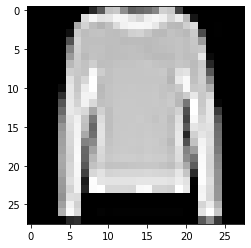

In [ ]:
plt.imshow(x_test[99],cmap='gray') # siyah beyaz görüntü için cmap ='gray' yazıldı

In [24]:
fashion_mnist_labels = np.array(['Tişört/üst','Pantolon','Kazak','Elbise','Ceket','Sandalet','Gömlek','Sneaker','Çanta','Bilekte Bot'])

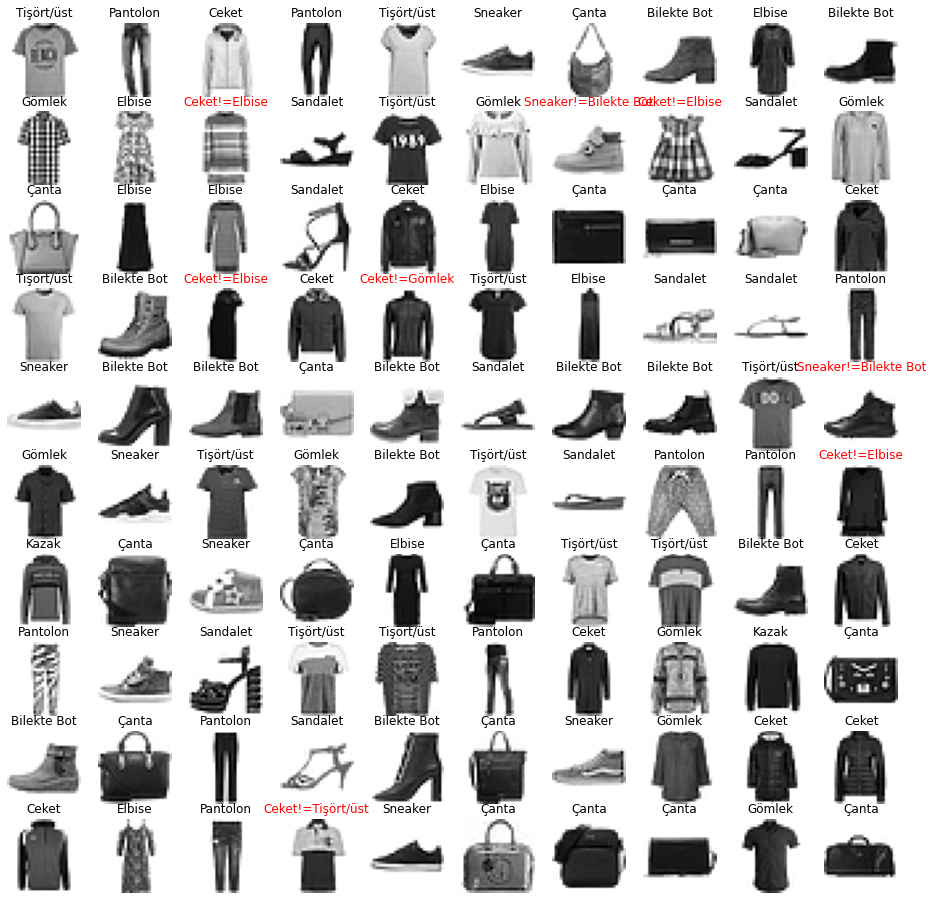

Doğru tahmin sayısı :  92
Hata sayısı :  8
Doğru tahmin oranı : % 92.0


In [38]:
root = '/gdrive/MyDrive/KerasEgitimi/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5') # önceden eğitilmiş 

def convertMnistData(image):
  img = image.astype('float32')
  img /= 255

  return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
  index = random.randint(0,x_test.shape[0])
  image = x_test[index]
  data = convertMnistData(image)

  plt.subplot(10,10,i+1)
  plt.imshow(image,cmap=cm.gray_r)
  plt.axis('off')

  ret = model.predict(data,batch_size=1)
  #yazdırma (ret)

  bestNum = 0.0
  bestClass = 0.0

  for n in range(10):
    if bestNum < ret[0][n]:
      bestNum = ret[0][n]
      bestClass = n

  if y_test[index] == bestClass:
    plt.title(fashion_mnist_labels[bestClass])
    right += 1
  else:
    plt.title(fashion_mnist_labels[bestClass] + '!=' + fashion_mnist_labels[y_test[index]],color='#ff0000')
    mistake += 1

plt.show()
print("Doğru tahmin sayısı : ",right)
print("Hata sayısı : ",mistake)
print("Doğru tahmin oranı : %",right/(mistake + right)*100)